In [38]:
import numpy as np
import matplotlib.image as img
import os
import matplotlib.pyplot as plt
from PIL import Image
import time
import pandas as pd
import scipy
from scipy import ndimage


%matplotlib inline

In [22]:
path = 'C:/Users/Sunil/Documents/Cats/'
imagesnames = os.listdir(path)
#print(imagesnames)
newpath ='C:/Users/Sunil/Documents/Newcat/'
imgsize =100


def resizeimages(imagesnames):
    #print(np.shape(imagesnames))
    for i in range(0,len(imagesnames)):
        newimg = Image.open(path+ str(imagesnames[i]))
        newimg = newimg.resize((imgsize,imgsize),Image.ANTIALIAS)
        #print(np.shape(newimg))
        newimg.save(newpath+str(imagesnames[i]))
        

In [23]:
resizeimages(imagesnames)
imagesnames1 = os.listdir(newpath)


In [24]:
# load values from excel to array

df = pd.read_excel('C:/Users/Sunil/Documents/Y.xlsx',sheet='Sheet1')
Y = df.values
Y = Y.T



In [25]:
def loadtrainimages(imagesnames1):
    for i in range(0,len(imagesnames1)):
        image = img.imread(newpath + imagesnames1[i])
        train_images.append(image)
    return train_images

In [26]:
def printimages(train_set):
    plt.figure()
    plt.imshow(train_set)
    

In [27]:
train_images=[]
train_set = loadtrainimages(imagesnames1)
#plt.imshow(train_set[1])

#for i in range(0,len(train_set)):
    #print(np.shape(train_set[i]))
    #printimages(train_set[i])
   

In [28]:
#creating array of the images

training_data = np.zeros((len(train_set),imgsize,imgsize,3))
# loading the pixel data into array

for i in range(0,len(train_set)):
    training_data[i] = train_set[i]


# Normalizing and reshapeing the pizel values 

training_data = training_data / 255
training_data = training_data.reshape(training_data.shape[0],-1).T

m_train = training_data.shape[1]


print(np.shape(training_data))
print(np.shape(Y))
print(m_train)


(30000, 88)
(1, 88)
88


In [29]:
# Applying deep learning to the above cat images after normalizing

In [30]:
#Sigmoid function

def sigmoid(z):
    sig  = 1 / (1 + np.exp(-z))
    return sig


In [31]:
#initializing parameter values
def initializeparameters(dim):
    w = np.zeros((dim,1))
    b=0
    return w,b

In [32]:
#forward propagation

def forwardprop(w,b,X,Y):
    m = X.shape[1]
    A = sigmoid(np.dot(w.T,X) + b)
    cost = np.sum((Y * np.log(A))  + ((1 - Y)* np.log(1 - A)) , axis=1) / -m 
    
    dw = dw = np.dot(X,(A - Y).T) /m
    db =  np.sum((A - Y),axis=1)/m
    grads = {"dw": dw,
             "db": db}
    
    return grads, cost

In [33]:
#optimize

def optimize(w, b, X, Y, num_iterations, learning_rate, print_cost = False):  
    costs = []
    
    for i in range(num_iterations):
        
        
        
        grads, cost = forwardprop(w, b, X, Y)
        
        
        
        dw = grads["dw"]
        db = grads["db"]
        
        
        w = w - learning_rate * dw
        b = b - learning_rate * db
       
        
        # Record the costs
        if i % 100 == 0:
            costs.append(cost)
        
        # Print the cost every 100 training examples
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
    
    params = {"w": w,
              "b": b}
    
    grads = {"dw": dw,
             "db": db}
    
    return params, grads, costs

In [34]:
# predict

def predict(w, b, X):
    
    m = X.shape[1]
    Y_prediction = np.zeros((1,m))
    w = w.reshape(X.shape[0], 1)
    
   
    A = 1 / (1 + np.exp(-(np.dot(w.T,X) + b)))
    
    
    for i in range(A.shape[1]):
        if A[0,i] >= 0.5 :
            Y_prediction[0,i] = 1
        else :
            Y_prediction[0,i] = 0
        pass
        
    
    assert(Y_prediction.shape == (1, m))
    
    return Y_prediction

In [35]:
#model

def model(X_train, Y_train, X_test, Y_test, num_iterations = 2000, learning_rate = 0.5, print_cost = False):
    
    # initialize parameters with zeros (≈ 1 line of code)
    w, b = initializeparameters(imgsize * imgsize * 3)

    # Gradient descent (≈ 1 line of code)
    parameters, grads, costs = optimize(w, b, X_train, Y_train, num_iterations, learning_rate, print_cost)
    
    # Retrieve parameters w and b from dictionary "parameters"
    w = parameters["w"]
    b = parameters["b"]
    
    # Predict test/train set examples (≈ 2 lines of code)
    Y_prediction_test = 0
    Y_prediction_train = predict(w, b, X_train)

    
    # Print train/test Errors
    print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))

    
    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test, 
         "Y_prediction_train" : Y_prediction_train, 
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}
    
    return d

In [36]:
test_set_x = training_data[3]
test_set_y = Y[:,3]

d = model(training_data, Y , test_set_x, test_set_y, num_iterations = 3500, learning_rate = 0.003, print_cost = True)

Cost after iteration 0: 0.693147
Cost after iteration 100: 1.445854
Cost after iteration 200: 0.420231
Cost after iteration 300: 0.103175
Cost after iteration 400: 0.082372
Cost after iteration 500: 0.069730
Cost after iteration 600: 0.060773
Cost after iteration 700: 0.053954
Cost after iteration 800: 0.048541
Cost after iteration 900: 0.044124
Cost after iteration 1000: 0.040442
Cost after iteration 1100: 0.037325
Cost after iteration 1200: 0.034651
Cost after iteration 1300: 0.032331
Cost after iteration 1400: 0.030299
Cost after iteration 1500: 0.028505
Cost after iteration 1600: 0.026910
Cost after iteration 1700: 0.025482
Cost after iteration 1800: 0.024196
Cost after iteration 1900: 0.023032
Cost after iteration 2000: 0.021974
Cost after iteration 2100: 0.021009
Cost after iteration 2200: 0.020123
Cost after iteration 2300: 0.019309
Cost after iteration 2400: 0.018557
Cost after iteration 2500: 0.017861
Cost after iteration 2600: 0.017216
Cost after iteration 2700: 0.016614
Cost

[[ 1.]]
Model prediction : Image has a cat


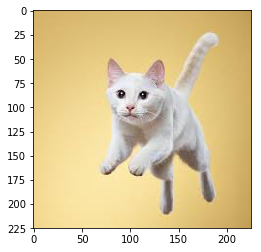

In [45]:
# test images
fname = 'C:/Users/Sunil/Documents/Testcat/testcat2.jpg'
image = np.array(ndimage.imread(fname, flatten=False))
my_image = scipy.misc.imresize(image, size=(imgsize,imgsize)).reshape((1, imgsize*imgsize*3)).T
my_image = my_image / 255
my_predicted_image = predict(d["w"], d["b"], my_image)



plt.imshow(image)
print( my_predicted_image)
if my_predicted_image[0] == 1:
    print("Model prediction : Image has a cat")
else:
    print("Model Prediction : Non - Cat image")